In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from functools import partial, reduce
import re, math, random

In [15]:
#
# functions for working with vectors
#

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

## 8.1 梯度下降思想

## 8.2 估算梯度   
差商估算法：直接使用微分的定義暴力估算

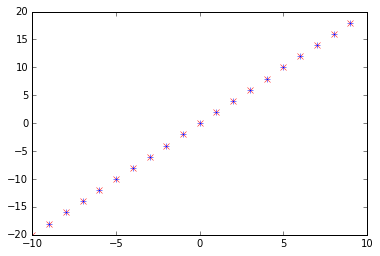

In [16]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def plot_estimated_derivative():

    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx')           # red  x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+')  # blue +
    plt.show()                                      # purple *, hopefully

plot_estimated_derivative()

In [17]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

## 8.3 使用梯度
這個範例很奇怪，沒有使用微分，就是直接拿結果值硬幹，換句話說步長是錯的   
阿，我誤會了，我們算的是平方，他已過一次了

In [18]:
def step(v, direction, step_size):
    """
    move step_size in the direction from v
    搞笑，方向應該是逆梯度，但不包含在這個函數，在 step_size 的參數中加上負值
    """
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

# 對平方作微分
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) 
    print(v)
    print(gradient)
    next_v = step(v, gradient, -0.01) #搞笑，步長是負的參數放在這裡
    if distance(next_v, v) < tolerance:
        break
    v = next_v
v

[-1, -1, 2]
[-2, -2, 4]
[-0.98, -0.98, 1.96]
[-1.96, -1.96, 3.92]
[-0.9604, -0.9604, 1.9208]
[-1.9208, -1.9208, 3.8416]
[-0.941192, -0.941192, 1.882384]
[-1.882384, -1.882384, 3.764768]
[-0.92236816, -0.92236816, 1.84473632]
[-1.84473632, -1.84473632, 3.68947264]
[-0.9039207968, -0.9039207968, 1.8078415936]
[-1.8078415936, -1.8078415936, 3.6156831872]
[-0.885842380864, -0.885842380864, 1.771684761728]
[-1.771684761728, -1.771684761728, 3.543369523456]
[-0.86812553324672, -0.86812553324672, 1.73625106649344]
[-1.73625106649344, -1.73625106649344, 3.47250213298688]
[-0.8507630225817856, -0.8507630225817856, 1.7015260451635712]
[-1.7015260451635712, -1.7015260451635712, 3.4030520903271424]
[-0.8337477621301499, -0.8337477621301499, 1.6674955242602998]
[-1.6674955242602998, -1.6674955242602998, 3.3349910485205996]
[-0.8170728068875469, -0.8170728068875469, 1.6341456137750938]
[-1.6341456137750938, -1.6341456137750938, 3.2682912275501876]
[-0.800731350749796, -0.800731350749796, 1.601462701

[-2.02172985518191e-06, -2.02172985518191e-06, 4.04345971036382e-06]

## 8.4 選擇正確步長
選擇步長是藝術，這裡建議每一步使用最小化目標函數來達到   
但是有些步長可能會導致錯誤，所以要加一個safe函數，如下  


In [19]:
def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # this means "infinity" in Python
    return safe_f

## 8.5 綜合
這個範例很奇怪，沒有使用微分，就是直接拿結果值硬幹

In [20]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn) # 注意 key 的妙用
        next_value = target_fn(next_theta)
        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [21]:
print("using minimize_batch")

v = [random.randint(-10,10) for i in range(3)]

v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))

using minimize_batch
minimum v [0.0007975367974709499, -0.0007975367974709499, -0.001063382396627933]
minimum value 2.4029120080986046e-06


In [22]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

## 8.6 隨機梯度下降法
有點看不太懂 stochastic 與 batch的差別

In [23]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [26]:
float("inf")

inf